# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Moving average smoothing

<br></font>
</div>

# What is moving average smoothing?

<div class="alert alert-block alert-info">
<font color=black><br>

- **Smoothing** is a technique applied to time series to remove the fine-grained variation between time steps. 
The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.
Moving averages are a simple and common type of smoothing used in time series analysis and time series 
forecasting.

<br><br>
- There are two main types of moving average that are used: 
    - **Centered**: This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal  components from a time series, a method that we often cannot use when forecasting. 
    - **Trailing Moving Average**: Trailing moving average only uses historical observations only

<br><br>
- Calculating a moving average of a time series makes some assumptions about your data. It is assumed that both trend and seasonal components have been removed from your time series. This means that your time series is STATIONARY, or does not show obvious trends (long-term increasing or decreasing movement) or 
seasonality (consistent periodic structure). 

<br></font>
</div>

# Import modules

In [11]:
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from numpy import mean
from math import sqrt
from sklearn.metrics import mean_squared_error

### Dataset

In [ ]:
"""
In this lesson, we will use the Daily Female Births Dataset as an example. This dataset describes the number 
of daily female births in California in 1959.
"""

### Moving average as a data preparation

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


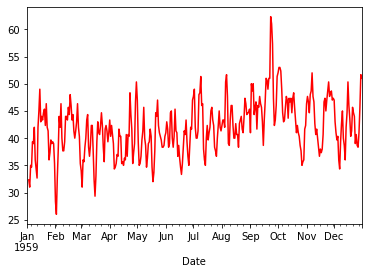

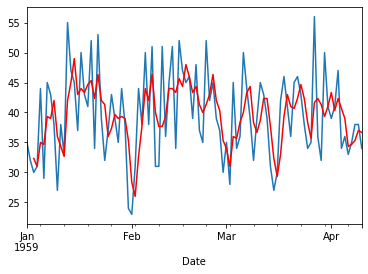

In [2]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# tail-rolling average transform
rolling = series.rolling(window=3) 
rolling_mean = rolling.mean() 
print(rolling_mean.head(10))

# plot original and transformed dataset series.plot() 
rolling_mean.plot(color='red') 
pyplot.show()

# zoomed plot original and transformed dataset
series[:100].plot() 
rolling_mean[:100].plot(color='red') 
pyplot.show()

### Moving Average as Feature Engineering

In [ ]:
"""
Running the example creates the new dataset and prints the first 10 rows. We can see that the first 3 rows 
cannot be used and must be discarded. The first row of the lag=1 dataset cannot be used because there are 
no previous observations to predict the first observation, therefore a NaN value is used.
"""

In [4]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)

window = lag3.rolling(window=width)
means = window.mean()

dataframe = concat([means, lag1, df], axis=1) 
dataframe.columns = ['mean', 't', 't+1'] 
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


### Moving Average as Prediction

In [ ]:
"""
The moving average value can also be used directly to make predictions. It is a naive model and assumes that 
the trend and seasonality components of the time series have ALREADY been removed or adjusted for.
"""

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


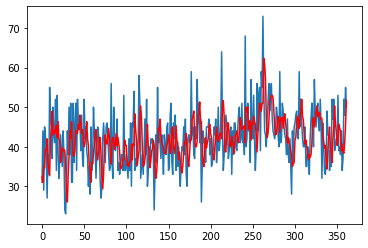

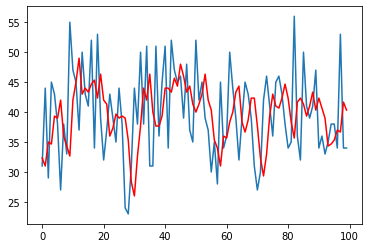

In [12]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)]) 
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red') 
pyplot.show()

# zoom plot
pyplot.plot(test[:100]) 
pyplot.plot(predictions[:100], color='red') 
pyplot.show()

In [ ]:
"""
Again, zooming in on the first 100 predictions gives an idea of the skill of the 3-day moving
average predictions. Note the window width of 3 was chosen arbitrary and was not optimised.
"""

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

<br></font>
</div>